In [2]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Cell 2: Load Titanic dataset
df = pd.read_csv('../data/Titanic-Dataset.csv')  # Replace with your file path if needed
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Cell 3: Dataset overview
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Cell 4: Numerical stats
df.describe()

# Cell 4b: Categorical stats
df.describe(include='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [7]:
# Cell 5: Handle missing values

# Fill 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' with most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_11164\3282727594.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11164\3282727594.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

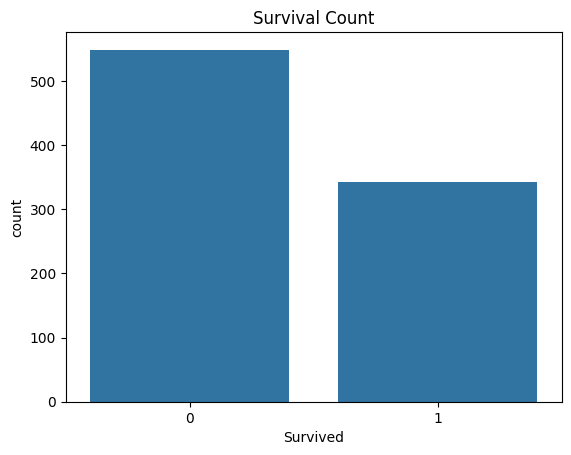

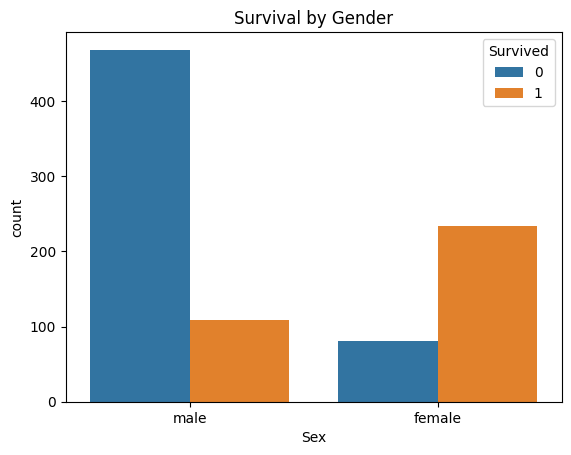

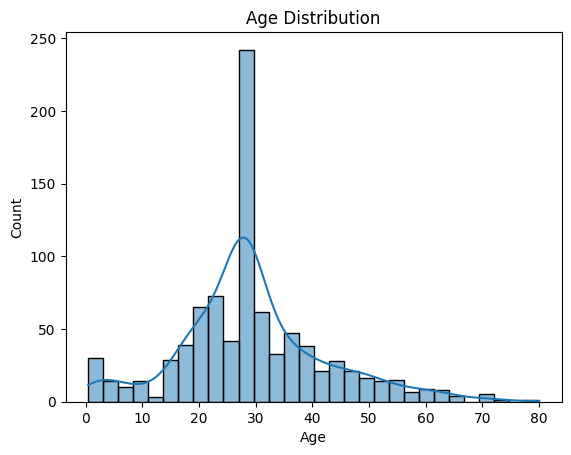

In [8]:
# Cell 6: Survival count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Cell 6b: Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Cell 6c: Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


In [9]:
# Cell 7: Convert categorical to numeric

# Encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [10]:
# Cell 8: Split data into train & test sets
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (712, 11)
Testing set shape: (179, 11)


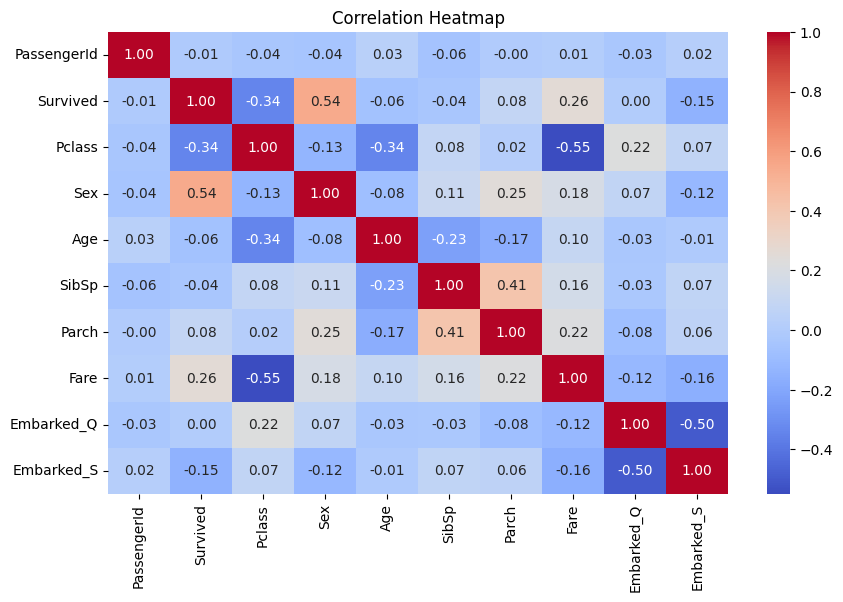

In [11]:
# Cell: Correlation Heatmap

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
# Cell 9: Model training imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle


In [21]:
# Cell 10: Logistic Regression training

# Drop non-numeric columns for model training
X_train_num = X_train.drop(columns=['Name', 'Ticket', 'PassengerId'])
X_test_num = X_test.drop(columns=['Name', 'Ticket', 'PassengerId'])

# After preprocessing in training
with open("model_features.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)


log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_num, y_train)

# Cross-validation (5 folds)
log_reg_cv = cross_val_score(log_reg, X_train_num, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression CV Accuracy: {log_reg_cv.mean():.4f} ± {log_reg_cv.std():.4f}")


Logistic Regression CV Accuracy: 0.7907 ± 0.0277


In [16]:
# Cell 11: Random Forest training
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_num, y_train)

# Cross-validation (5 folds)
rf_cv = cross_val_score(rf_clf, X_train_num, y_train, cv=5, scoring='accuracy')
print(f"Random Forest CV Accuracy: {rf_cv.mean():.4f} ± {rf_cv.std():.4f}")


Random Forest CV Accuracy: 0.7964 ± 0.0252


In [18]:
# Cell 12: Predictions and metrics
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test_num)
    print(f"\n{name} Performance on Test Set:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Performance on Test Set:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
Confusion Matrix:
 [[90 15]
 [19 55]]

Random Forest Performance on Test Set:
Accuracy: 0.7989
Precision: 0.7639
Recall: 0.7432
F1 Score: 0.7534
Confusion Matrix:
 [[88 17]
 [19 55]]


In [19]:
# Cell 13: Select the best-performing model
best_model = rf_clf if rf_cv.mean() > log_reg_cv.mean() else log_reg
print(f"Best model selected: {type(best_model).__name__}")


Best model selected: RandomForestClassifier


In [20]:
# Cell 14: Save the best model using pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'
